<h1 align='center'><font size='15'>Final Project: Classification with Python</font></h1>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">About Project</a></li>
    <li><a href="https://#Section_2">Importing Data </a></li>
    <li><a href="https://#Section_3">Data Preprocessing</a> </li>
    <li><a href="https://#Section_4">Transforming Categorical Variables </a></li>
    <li><a href="https://#Section_5">Train and Test Data Split </a></li>
    <li><a href="https://#Section_6">Train Linear Regression, KNN, Decision Tree, Logistic Regression, and SVM models and return their appropriate accuracy scores</a></li>
</a></li>

<hr>

# About Project

Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report displaying the accuracy scores.

<hr>

## Import the Required Libraries

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [5]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\cW\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 22.2.2
   setuptools: 63.4.1
        numpy: 1.24.4
        scipy: 1.9.1
       Cython: 0.29.32
       pandas: 1.1.5
   matplotlib: 3.5.2
       joblib: 1.3.1
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\cW\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: Haswell
    num_threads: 4

       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\cW\AppData\Roaming\Python\Python39\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 4

       user_api: blas
   internal_ap

<hr>

## Importing the Dataset

In [6]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


Describing the Data

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


Finding the correlation values

In [8]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028,0.939307,0.753147
MaxTemp,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217,0.858639,0.960805
Rainfall,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999,-0.054297,-0.142748
Evaporation,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422,0.606122,0.474599
Sunshine,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861,0.113891,0.345528
WindGustSpeed,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016,0.159570,0.036216
WindSpeed9am,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030,-0.334084,-0.351836
WindSpeed3pm,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435,0.280009,0.136713
Humidity9am,0.053946,-0.185382,0.332636,-0.395651,-0.490631,-0.225613,-0.189763,-0.288910,1.000000,0.657933,0.262098,0.249202,0.431550,0.331062,-0.145944,-0.155192
Humidity3pm,0.273269,-0.150741,0.305635,-0.102295,-0.586476,-0.095037,-0.148849,-0.135039,0.657933,1.000000,0.151608,0.179611,0.463529,0.472248,0.131855,-0.212696


<AxesSubplot:>

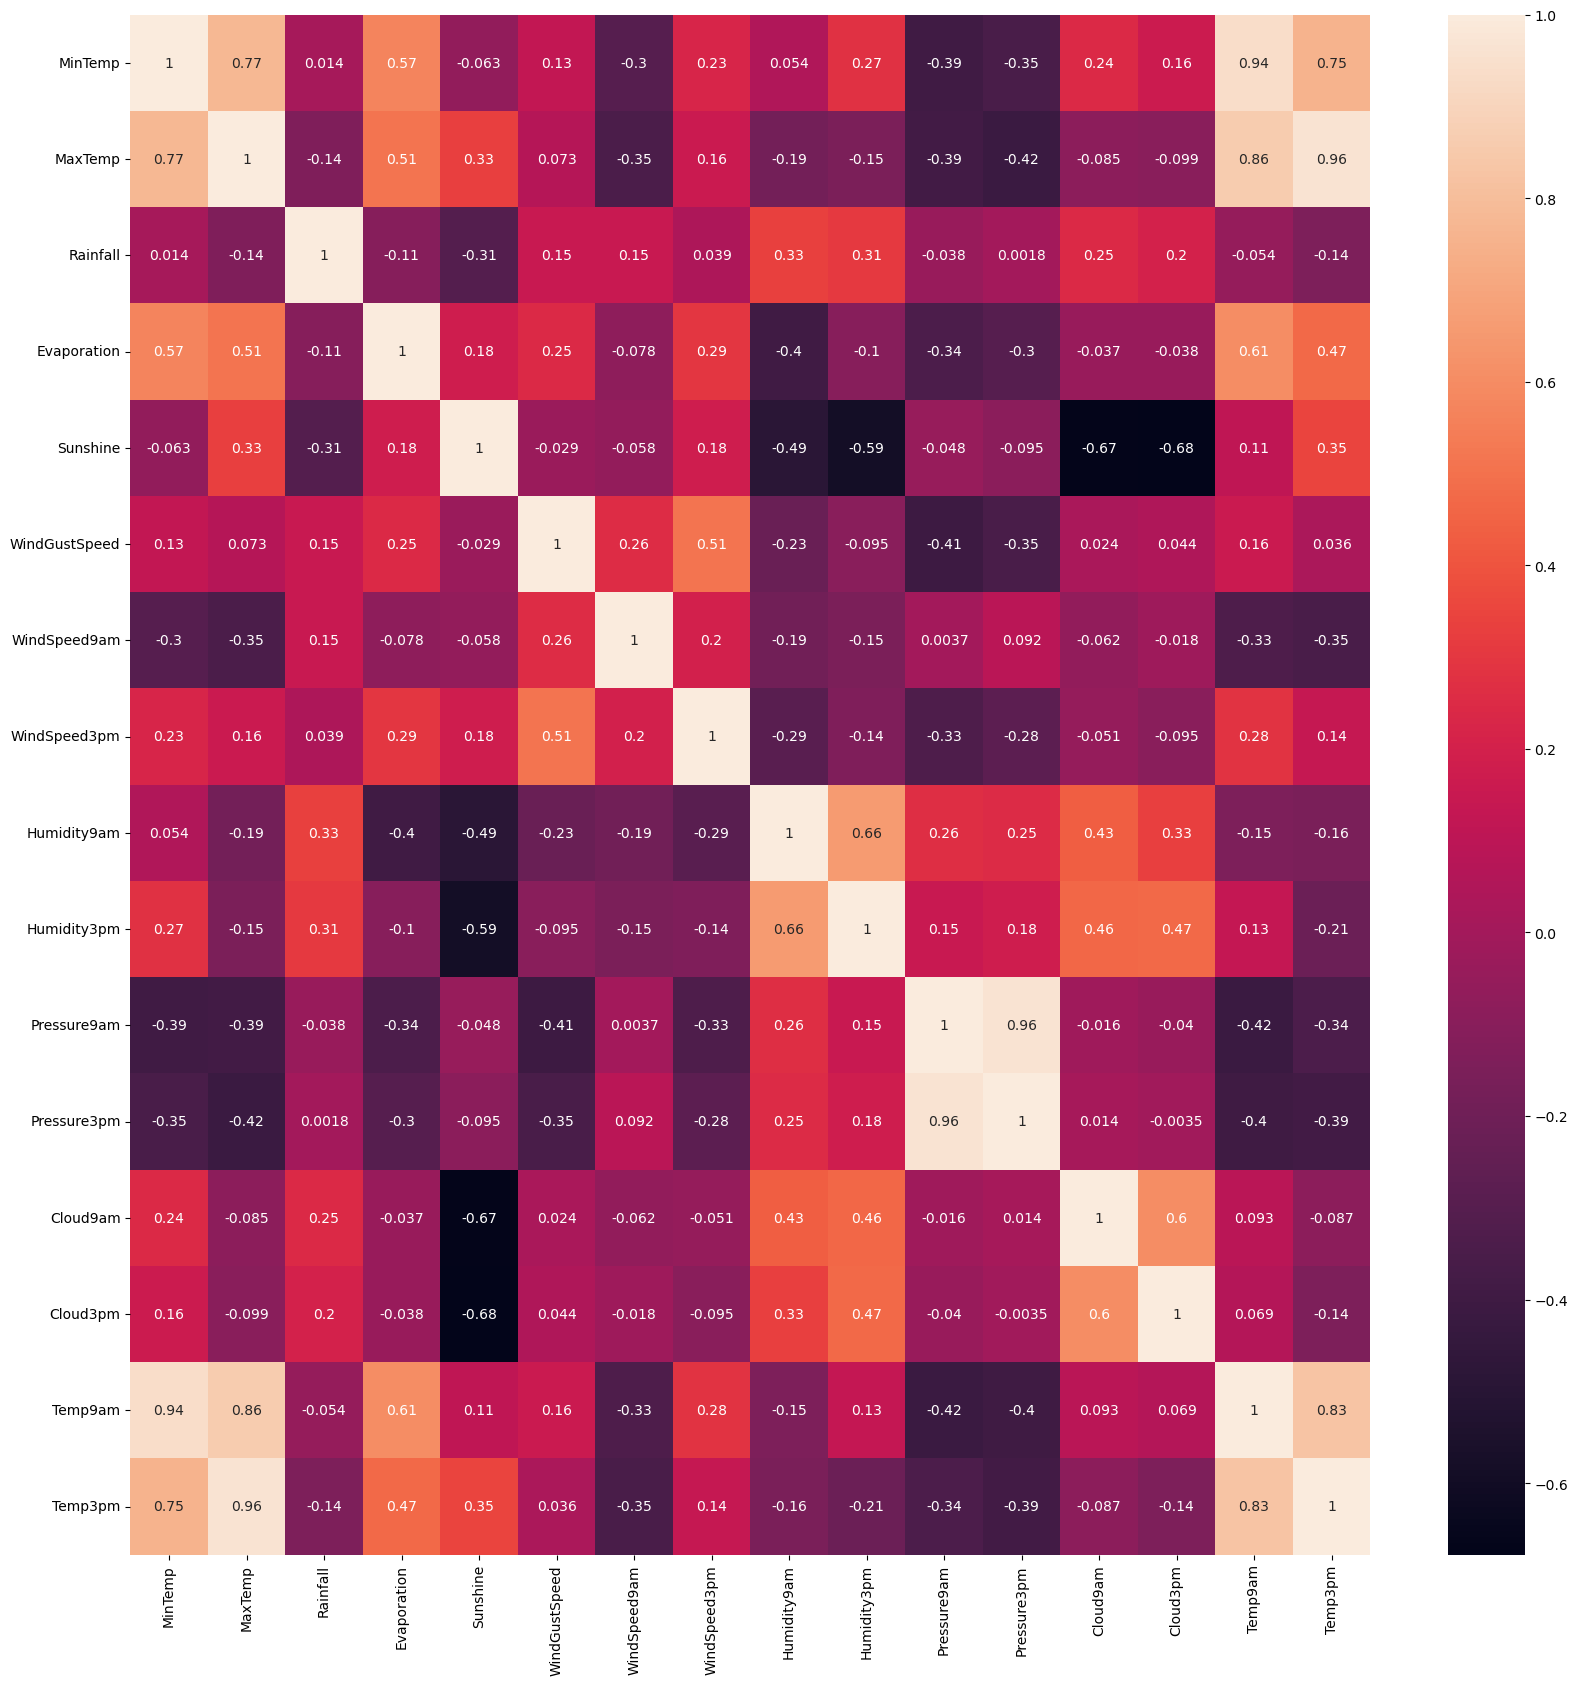

In [9]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [10]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

<hr>

## Data Preprocessing

### Transforming Categorical Variables

First, we need to convert categorical variables to binary variables. We will use pandas <code>get_dummies()</code> method for this.

In [11]:
df.loc[:, ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']]

,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,Yes,W,S,SSW
1,Yes,W,W,E
2,Yes,W,ESE,ESE
3,Yes,W,NNE,E
4,Yes,W,NNE,W
...,...,...,...,...
3266,No,SSE,W,SSE
3267,No,W,W,ESE
3268,No,W,WNW,N
3269,No,W,W,W


In [12]:
df_sydney = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the <code>get_dummies</code> method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.

In [13]:
df_sydney.replace(['No', 'Yes'], [0, 1], inplace=True)

<hr>

## Training Data and Test Data

Now, we set our 'features' or x values and our Y or target variable.

In [14]:
df_sydney.drop('Date', axis=1, inplace=True)

In [15]:
df_sydney = df_sydney.astype(float)

In [16]:
features = df_sydney.drop(columns='RainTomorrow', axis=1)
Y = df_sydney['RainTomorrow']

<hr>

## Linear Regression

#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).

In [18]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [19]:
predictions = LinearReg.predict(x_test)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [20]:
LinearRegression_MAE = metrics.mean_absolute_error(predictions, y_test)
LinearRegression_MSE = metrics.mean_squared_error(predictions, y_test)
LinearRegression_R2 = metrics.r2_score(predictions, y_test)
print('Linear Regression MAE: ', LinearRegression_MAE)
print('Linear Regression MSE: ', LinearRegression_MSE)
print('Linear Regression: ', LinearRegression_R2)

Linear Regression MAE:  0.2563270627087309
Linear Regression MSE:  0.11572790471961338
Linear Regression:  -0.3848970426668581


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.

In [21]:
Report = {'MSE': [LinearRegression_MSE], 'MAE': [LinearRegression_MAE], 'R2': [LinearRegression_R2]}
Report = pd.DataFrame(Report)
Report.index = ['Linear Regression']
Report

,MSE,MAE,R2
Linear Regression,0.115728,0.256327,-0.384897


<hr>

## K-Nearest Neighbors (KNN)

#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.

In [22]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [30]:
! pip install threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.20.0 requires scikit-learn<1.3.0,>=0.24.0, but you have scikit-learn 1.3.0 which is incompatible.
pycaret 3.0.3 requires numpy<1.24,>=1.21, but you have numpy 1.24.4 which is incompatible.
pycaret 3.0.3 requires pandas<2.0.0,>=1.3.0, but you have pandas 1.1.5 which is incompatible.


In [23]:
predictions = KNN.predict(x_test)

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [24]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
print('KNN Accuracy Score: ', KNN_Accuracy_Score)
print('KNN Jaccard Index: ', KNN_JaccardIndex)
print('KNN F1 Score: ', KNN_F1_Score)

KNN Accuracy Score:  0.8183206106870229
KNN Jaccard Index:  0.7901234567901234
KNN F1 Score:  0.802374933635524


<hr>

## Decision Tree

#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).

In [25]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=8)
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [26]:
predictions = Tree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [27]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
Tree_F1_Score = f1_score(y_test, predictions)
print('Tree Accuracy Score: ', Tree_Accuracy_Score)
print('Tree Jaccard Index: ', Tree_JaccardIndex)
print('Tree F1 Score: ', Tree_F1_Score)

Tree Accuracy Score:  0.7862595419847328
Tree Jaccard Index:  0.750445632798574
Tree F1 Score:  0.5731707317073171


<hr>

## Logistic Regression

#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [29]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

#### Q14) Now, use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [30]:
predictions = LR.predict(x_test)

#### Q15) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [32]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))
print('LR Accuracy Score: ', LR_Accuracy_Score)
print('LR Jaccard Index: ', LR_JaccardIndex)
print('LR F1 Score: ', LR_F1_Score)
print('LR Log Loss: ', LR_Log_Loss)

LR Accuracy Score:  0.8351145038167939
LR Jaccard Index:  0.8018348623853211
LR F1 Score:  0.6707317073170731
LR Log Loss:  0.38155847529580805


<hr>

## Super Vector Machine (SVM)

#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).

In [33]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [34]:
predictions = SVM.predict(x_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [35]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions)
print('SVM Accuracy Score: ', SVM_Accuracy_Score)
print('SVM Jaccard Index: ', SVM_JaccardIndex)
print('SVM F1 Score: ', SVM_F1_Score)

SVM Accuracy Score:  0.8412213740458016
SVM Jaccard Index:  0.8091743119266055
SVM F1 Score:  0.6790123456790124


<hr>

## Report

#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model

In [38]:
Report = {'Classification Algorithm': ['KNN, K=4', 'Decision Tree', 'Logistic Regression', 'SVM'],
        'Accuracy Score': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
        'Jaccard Score': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex,],
        'F1-score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score], 
        'LogLoss': ['N/A', 'N/A', LR_Log_Loss, 'N/A']}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score,Jaccard Score,F1-score,LogLoss
0,"KNN, K=4",0.818321,0.790123,0.802375,N/A
1,Decision Tree,0.786260,0.750446,0.573171,N/A
2,Logistic Regression,0.835115,0.801835,0.670732,0.381558
3,SVM,0.841221,0.809174,0.679012,N/A


In [39]:
import plotly.express as px

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Jaccard Score'], name='Jaccard Score'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['LogLoss'], name='LogLoss'), row=1,col=1
)

fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()

# Fin.

<hr>

### About the Author
**Ali Abdullah** 

<a href="https://www.linkedin.com/in/imaliabdullah/">Click here for Linkedin Profile</a>